In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
import time #helper libraries

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/open?id=1y394o-wiPqYPaWzVYTPRr8xpE_aM9621'
#OHLC CSV 파일 드라이브 링크

In [ ]:
fluff, id = link.split('=')
print (id) # Verify that you have everything after '='

1y394o-wiPqYPaWzVYTPRr8xpE_aM9621


In [ ]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AMZN.csv')  
df3 = pd.read_csv('AMZN.csv')
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df3 = df3.dropna(axis = "columns")

In [ ]:
df3.head()

,Date,Open,High,Low,Adj Close,Volume,Close
0,1/4/2010,136.250000,136.610001,133.139999,133.899994,7599900,133.899994
1,1/5/2010,133.429993,135.479996,131.809998,134.690002,8851900,134.690002
2,1/6/2010,134.600006,134.729996,131.649994,132.250000,7178800,132.250000
3,1/7/2010,132.009995,132.320007,128.800003,130.000000,11030200,130.000000
4,1/8/2010,130.559998,133.679993,129.029999,133.520004,9830500,133.520004


In [ ]:
import numpy as np


In [ ]:
df_close = df3['Close']
# close 값에만 집중하기

In [ ]:
df_close.shape


(2265,)

In [ ]:
#Reshaping it
df_close = df_close.values.reshape(2265,1)

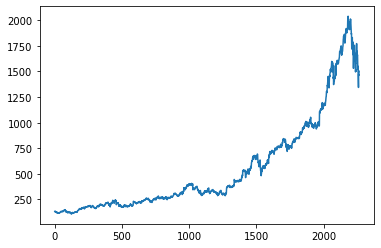

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

#Ploting it
plt.plot(df_close)
plt.show()

scaler = MinMaxScaler(feature_range=(0, 1))
df_close = scaler.fit_transform(df_close)

In [ ]:
train_size = int(len(df_close) * 0.80)
test_size = len(df_close) - train_size
train, test = df_close[0:train_size,:], df_close[train_size:len(df_close),:]
print(len(train), len(test))

1812 453


In [ ]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1): #keep only similar value data if a data point is too far of the last one jump to the next value
	dataX, dataY = [], []       #put this in data x
	for i in range(len(dataset)-look_back-1): #let dataY have only output values
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [ ]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [ ]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [ ]:
# Build Model
model = Sequential()

model.add(LSTM(
    input_dim=1,
    units=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    units=1))
model.add(Activation('relu'))

start = time.time()
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])
print ('compilation time : ', time.time() - start)

compilation time :  0.014111757278442383


In [ ]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=80,
    validation_split=0.05)

Epoch 1/80
14/14 [==============================] - 9s 52ms/step - loss: 0.0149 - mae: 0.0861 - val_loss: 0.0494 - val_mae: 0.2215
Epoch 2/80
14/14 [==============================] - 0s 7ms/step - loss: 0.0067 - mae: 0.0639 - val_loss: 0.0413 - val_mae: 0.2026
Epoch 3/80
14/14 [==============================] - 0s 6ms/step - loss: 0.0051 - mae: 0.0553 - val_loss: 0.0249 - val_mae: 0.1572
Epoch 4/80
14/14 [==============================] - 0s 7ms/step - loss: 0.0034 - mae: 0.0458 - val_loss: 0.0117 - val_mae: 0.1078
Epoch 5/80
14/14 [==============================] - 0s 6ms/step - loss: 0.0015 - mae: 0.0305 - val_loss: 0.0040 - val_mae: 0.0628
Epoch 6/80
14/14 [==============================] - 0s 7ms/step - loss: 5.1072e-04 - mae: 0.0169 - val_loss: 9.6142e-05 - val_mae: 0.0088
Epoch 7/80
14/14 [==============================] - 0s 6ms/step - loss: 2.6011e-04 - mae: 0.0115 - val_loss: 2.8338e-05 - val_mae: 0.0038
Epoch 8/80
14/14 [==============================] - 0s 6ms/step - loss: 2

In [ ]:
model.fit(
    trainX,
    trainY,
    batch_size=128,
    epochs=40,
    validation_split=0.05)

Epoch 1/40
14/14 [==============================] - 0s 9ms/step - loss: 1.1771e-04 - mae: 0.0077 - val_loss: 1.2990e-04 - val_mae: 0.0104
Epoch 2/40
14/14 [==============================] - 0s 7ms/step - loss: 1.2038e-04 - mae: 0.0081 - val_loss: 2.7745e-05 - val_mae: 0.0038
Epoch 3/40
14/14 [==============================] - 0s 7ms/step - loss: 1.3192e-04 - mae: 0.0084 - val_loss: 2.6813e-05 - val_mae: 0.0037
Epoch 4/40
14/14 [==============================] - 0s 7ms/step - loss: 1.2939e-04 - mae: 0.0082 - val_loss: 1.5152e-04 - val_mae: 0.0114
Epoch 5/40
14/14 [==============================] - 0s 7ms/step - loss: 1.1725e-04 - mae: 0.0078 - val_loss: 1.3788e-04 - val_mae: 0.0108
Epoch 6/40
14/14 [==============================] - 0s 6ms/step - loss: 1.1558e-04 - mae: 0.0077 - val_loss: 5.4838e-05 - val_mae: 0.0062
Epoch 7/40
14/14 [==============================] - 0s 7ms/step - loss: 1.3347e-04 - mae: 0.0088 - val_loss: 2.7547e-05 - val_mae: 0.0038
Epoch 8/40
14/14 [================

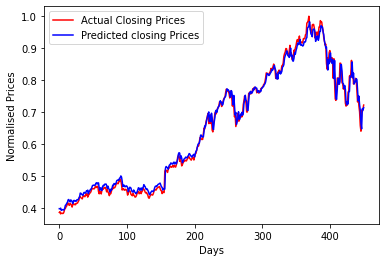

In [ ]:
import matplotlib.pyplot as plt
predicted_stateful = model.predict(testX)
plt.plot(testY, color = 'red',label = 'Actual Closing Prices')
plt.plot(predicted_stateful.flatten(), color = 'blue', label  = 'Predicted closing Prices')
plt.xlabel('Days')
plt.ylabel('Normalised Prices')
plt.legend(loc='best')
plt.show()

In [ ]:
mae = model.evaluate(trainX,
    trainY,
    batch_size=128,verbose=1)

15/15 [==============================] - 0s 2ms/step - loss: 7.4152e-05 - mae: 0.0078


In [31]:
from keras.models import load_model
model.save('future_prediction_lstm.h5')